In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve, learning_curve
from matplotlib import pyplot as plt

%matplotlib inline

In [43]:
data = pd.read_csv('./churn.csv')
y = data['Churn?'].map(lambda x:0 if x=='False.' else 1)
data.drop(['State', 'Churn?', 'Phone'], axis=1, inplace=True)
a = np.array(data.columns.values)
b = np.array(['Account length' ,'Area code' ,'International plan' ,'Voice mail plan' ,'Number vmail messages' ,'Total day minutes' ,'Total day calls' ,'Total day charge' ,'Total eve minutes' ,'Total eve calls' ,'Total eve charge' ,'Total night minutes' ,'Total night calls' ,'Total night charge' ,'Total intl minutes' ,'Total intl calls' ,'Total intl charge' ,'Customer service calls'])
data.rename(columns=dict(zip(a,b)), inplace=True)

data['International plan'] = data['International plan'].map({'yes': 1, 'no': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'yes': 1, 'no': 0})
X = data.values

In [44]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17, max_iter=5)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), 
                       ('sgd_logit', sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X, y,
                                       'sgd_logit__alpha', alphas, cv=5,
                                       scoring='roc_auc')

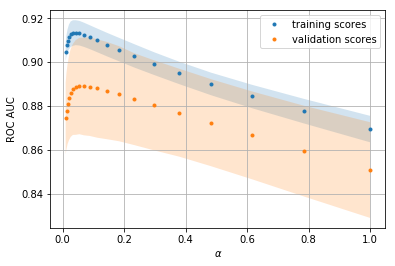

In [49]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '.', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$'); plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)

In [50]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), 
                           ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

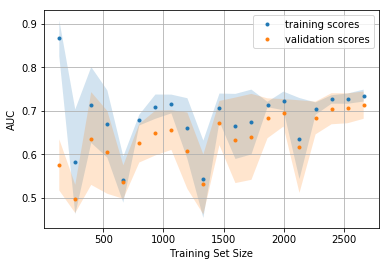

In [51]:
plot_learning_curve(degree=2, alpha=10)

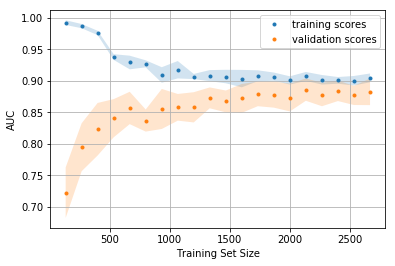

In [52]:
plot_learning_curve(degree=2, alpha=0.05)

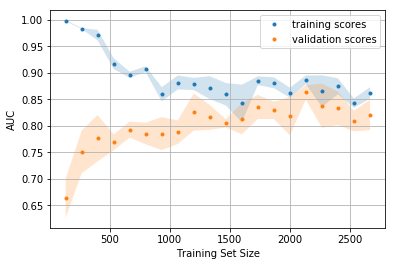

In [53]:
plot_learning_curve(degree=2, alpha=1e-4)